In [3]:
import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
from tqdm import tqdm
import datetime
import proplot as plot
from netCDF4 import Dataset
from wrf import getvar
%matplotlib inline

plot.rc.update({'figure.facecolor':'w','axes.labelweight':'ultralight',
                'tick.labelweight':'ultralight','gridminor.linestyle':'--','title.weight':'normal','linewidth':0.5})

In [4]:
import pickle
path = './output/1010_ns/'
filePCA = [path+'dtheta_pca_ns',path+'du_pca_ns',path+'dv_pca_ns',path+'urad_pca_ns',path+'vtan_pca_ns',path+'w_pca_ns',
          path+'uradR_pca_ns',path+'vtanR_pca_ns']
fileA = [path+'normalT_ctrl_ns',path+'normalDU_ctrl_ns',path+'normalDV_ctrl_ns',path+'normalUrad_ctrl_ns',path+'normalVtan_ctrl_ns',
         path+'normalw_ctrl_ns',path+'normalUradR_ctrl_ns',path+'normalVtanR_ctrl_ns']
fileAf = [path+'normalT_ctrlf_ns',path+'normalDU_ctrlf_ns',path+'normalDV_ctrlf_ns',path+'normalUrad_ctrlf_ns',path+'normalVtan_ctrlf_ns',
          path+'normalw_ctrlf_ns',path+'normalUradR_ctrlf_ns',path+'normalVtanR_ctrlf_ns']

outputPCA,outputA,outputAf = [],[],[]
for i in range(len(filePCA)):
    with open(filePCA[i],'rb') as f:
        outputPCA.append(pickle.load(f))
    with open(fileA[i],'rb') as f:
        outputA.append(pickle.load(f))
    with open(fileAf[i],'rb') as f:
        outputAf.append(pickle.load(f))

PCA_dict = {'dtheta':outputPCA[0],'du':outputPCA[1],'dv':outputPCA[2],'u':outputPCA[3],'v':outputPCA[4],'w':outputPCA[5],
           'ur':outputPCA[6],'vr':outputPCA[7]}
A_dict = {'dtheta':outputA[0],'du':outputA[1],'dv':outputA[2],'u':outputA[3],'v':outputA[4],'w':outputA[5],
         'ur':outputA[6],'vr':outputA[7]}
Af_dict = {'dtheta':outputAf[0],'du':outputAf[1],'dv':outputAf[2],'u':outputAf[3],'v':outputAf[4],'w':outputAf[5],
          'ur':outputAf[6],'vr':outputAf[7]}

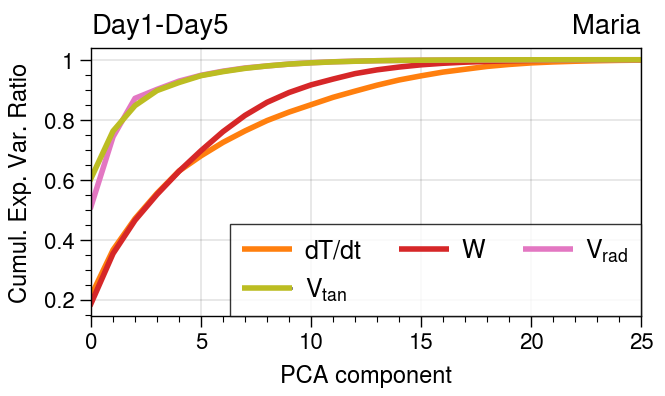

In [5]:
import matplotlib.patheffects as path_effects
import matplotlib as mpl
cmap = mpl.cm.get_cmap('tab10')
cmapC = cmap((np.linspace(0.15,0.8,5)))
fig,axs = plot.subplots(ncols=1,nrows=1,axwidth=2.75,refaspect=2.051,span=False)
with sns.color_palette("Spectral", n_colors=5):
    axs[0].plot(np.linspace(0,PCA_dict['dtheta'].explained_variance_ratio_.cumsum().shape[0]-1,\
                            PCA_dict['dtheta'].explained_variance_ratio_.cumsum().shape[0]),\
                PCA_dict['dtheta'].explained_variance_ratio_.cumsum(),lw=2,label='dT/dt',color=cmapC[0])
    axs[0].plot(np.linspace(0,PCA_dict['w'].explained_variance_ratio_.cumsum().shape[0]-1,\
                            PCA_dict['w'].explained_variance_ratio_.cumsum().shape[0]),\
                PCA_dict['w'].explained_variance_ratio_.cumsum(),lw=2,label='W',color=cmapC[1])
#    axs[0].plot(np.linspace(0,PCA_dict['dv'].explained_variance_ratio_.cumsum().shape[0]-1,\
#                            PCA_dict['dv'].explained_variance_ratio_.cumsum().shape[0]),\
#                PCA_dict['dv'].explained_variance_ratio_.cumsum(),lw=2,label='dV',color=cmapC[2])
    axs[0].plot(np.linspace(0,PCA_dict['u'].explained_variance_ratio_.cumsum().shape[0]-1,\
                            PCA_dict['u'].explained_variance_ratio_.cumsum().shape[0]),\
                PCA_dict['u'].explained_variance_ratio_.cumsum(),lw=2,label=r'V$_{rad}$',color=cmapC[3])
    axs[0].plot(np.linspace(0,PCA_dict['v'].explained_variance_ratio_.cumsum().shape[0]-1,\
                            PCA_dict['v'].explained_variance_ratio_.cumsum().shape[0]),\
                PCA_dict['v'].explained_variance_ratio_.cumsum(),lw=2,label=r'V$_{tan}$',color=cmapC[4],
                path_effects=[path_effects.Stroke(linewidth=1,foreground='k'),path_effects.Normal()])
axs[0].format(xlabel='PCA component',ylabel='Cumul. Exp. Var. Ratio')
axs[0].legend(loc='lr')
axs.format(xlim=[0,25],ltitle='Day1-Day5',rtitle='Maria')
for axis in axs:
    axis.yaxis.label.set_size(8.5)
    axis.xaxis.label.set_size(8.5)
    axis.tick_params(axis='both', which='major', labelsize=8)
#plt.savefig('./proc_fig/new_PCA_culvar.png',dpi=200)
plt.show()

#### Read sensitivity

In [6]:
def read_some_azimuth_fields(fileloc=None,fieldname=None):
    dict_name = {}
    for inx,obj in enumerate(fileloc):
        field_read = xr.open_dataset(obj)
        dict_name[fieldname[inx]] = field_read
    return dict_name

origin_path = '/scratch/06040/tg853394/tc/output/redux/maria/'
ctrlvar_dict = read_some_azimuth_fields(fileloc=[origin_path+'ctl/azim_U_0-144hr.nc',
                                                origin_path+'ctl/azim_U10_0-144hr.nc',
                                                 origin_path+'ctl/azim_V_0-144hr.nc',
                                                origin_path+'ctl/azim_V10_0-144hr.nc',
                                                origin_path+'ctl/azim_T_0-144hr.nc',
                                                origin_path+'ctl/azim_QVAPOR_0-144hr.nc'],
                                        fieldname=['U','U10','V','V10','T','QVAPOR'])

#### Functions

In [8]:
#Function####################################################
import json,pickle
def read_some_azimuth_fields(fileloc=None,fieldname=None):
    dict_name = {}
    for inx,obj in enumerate(fileloc):
        field_read = xr.open_dataset(obj)
        dict_name[fieldname[inx]] = field_read
    return dict_name
def nearest_index(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx.values
def save_to_pickle(loc=None,var=None):
    with open(loc,"wb") as f:
        pickle.dump(var,f)
    return None
####################################################################################################################################
# Export correlation/covariance maps
def export_corrmap(PCAinput=None,orig_normalarray=None,orig_flatarray=None,component=4,TYPE='correlation'):
    # Adapted from eofs package
    slicer = slice(0,component)
    dt_eigenvector = PCAinput.components_[:,slicer].copy()/np.sqrt(PCAinput.explained_variance_[slicer])
    dt_eigenvector_a = dt_eigenvector-np.nanmean(dt_eigenvector,axis=0)
    ############################################
    # Center pcs and field
    ############################################
    pcs_std = np.nanstd(dt_eigenvector_a,axis=0)
    field_std = np.nanstd(orig_flatarray,axis=0)
    ############################################
    # Set the divisor.
    ############################################
    div = np.float64(dt_eigenvector_a.shape[0])
    ############################################
    # Compute the correlation map.
    ############################################
    cor = np.ma.dot(orig_flatarray.T, dt_eigenvector_a).T / div
    if TYPE=='correlation':
        cor = np.ma.masked_invalid(cor)
        cor /= np.ma.outer(pcs_std, field_std)
    else:
        cor=cor
    
    output = []
    for cornum in cor:
        output.append(cornum.reshape(orig_normalarray[0,:,:,:].shape))
    return output
##############################################################################################################################################
# Polar to Cartesian
import scipy
def azimuth2angle(azimuth=None):
    """
    https://math.stackexchange.com/questions/926226/conversion-from-azimuth-to-counterclockwise-angle
    """
    angletest = 450-azimuth
    for index,item in enumerate(angletest):
        if item>360:
            angletest[index] = item-360
        else:
            continue
    return angletest

def closest_index(array=None,target=None):
    return np.abs(array-target).argmin()

def polar2cartesian(outcoords, inputshape, origin):
    """Coordinate transform for converting a polar array to Cartesian coordinates. 
    inputshape is a tuple containing the shape of the polar array. origin is a
    tuple containing the x and y indices of where the origin should be in the
    output array."""

    xindex, yindex = outcoords
    x0, y0 = origin
    x = xindex - x0
    y = yindex - y0

    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    theta_index = np.round((theta + np.pi) * inputshape[1] / (2 * np.pi))

    return (r,theta_index)

def proc_tocart(polarfield=None,angle=None,twoD=True,twoDlv=None,standard=False):
    if twoD==True:
        PWnew = [np.asarray(polarfield)[int(twoDlv),int(np.abs(ANGLE-360).argmin()),:]]
        for i in np.linspace(0,358,359):
            PWnew.append(np.asarray(polarfield)[int(twoDlv),int(np.abs(ANGLE-i).argmin()),:])
        PWnew = np.swapaxes(np.asarray(PWnew),0,1)
        del i
        
        if standard==True:
            PWnew = (PWnew-np.nanmean(PWnew))/np.nanstd(PWnew)
        else:
            PWnew=PWnew

        test_2cartesian = scipy.ndimage.geometric_transform(PWnew, 
                                                            polar2cartesian,order=0,mode='constant',
                                                            output_shape = \
                                                            (PWnew.shape[0] * 2,PWnew.shape[0] * 2),
                                                            extra_keywords = \
                                                            {'inputshape':PWnew.shape,
                                                             'origin':(PWnew.shape[0],PWnew.shape[0])})
        #print('Finish processing')
        return ((test_2cartesian))
##############################################################################################################################################
# Reconstruction from PCA
def reconstruct_fromPCA(PCAdict=None,Afdict=None,Adict=None,component=5,ALL='No'):
    if ALL=='Yes':
        Xhat = np.dot(PCAdict.transform(Afdict)[:,:],PCAdict.components_[:,:])
    else:
        Xhat = np.dot(PCAdict.transform(Afdict)[:,:int(component)],PCAdict.components_[:int(component),:])
    Xhatc = Xhat.copy()
    Xhatc+=np.mean(Afdict, axis=0)
    TESTrecon = Xhatc.reshape((Xhatc.shape[0],Adict[0].shape[0],Adict[0].shape[1],\
                               Adict[0].shape[2]))
    return TESTrecon
##############################################################################################################################################
# Preprocessing fields
def preproc_fields(var=None,timezoom=None,smooth='Yes',gaussian=0.9,fromcenter='Yes',inradius=None,outradius=None,dostandard='Yes'):
    """
    Var: Input variable (must have 4 dimensions! Time-pres-theta-radius)
    """
    if smooth=='Yes':
        from scipy.ndimage import gaussian_filter
        normal_var = []
        if dostandard=='Yes':
            for presindex in range(len(var[0,:,0,0])):
                normal_var.append(gaussian_filter(normalize_inner(var[:,presindex,:,:],outradius,'Yes'),sigma=gaussian))
        elif dostandard=='No':
            for presindex in range(len(var[0,:,0,0])):
                normal_var.append(gaussian_filter(normalize_inner(var[:,presindex,:,:],outradius,'No'),sigma=gaussian))            
        normal_var = np.swapaxes(np.asarray(normal_var),0,1)
    else:
        normal_var = []
        for presindex in range(len(var[0,:,0,0])):
            normal_var.append(normalize_inner(var[:,presindex,:,:],outradius))
        normal_var = np.swapaxes(np.asarray(normal_var),0,1)
    if fromcenter=='Yes':
        normal_varf = np.asarray([normal_var[i,:,:,:outradius].flatten() \
                                  for i in range(len(normal_var[timezoom[0]:timezoom[1],0,0,0]))])
    elif fromcenter=='No':
        normal_varf = np.asarray([normal_var[i,:,:,inradius:outradius].flatten() \
                                  for i in range(len(normal_var[timezoom[0]:timezoom[1],0,0,0]))])        
    print("--Finish preprocesing--")
    return normal_var,normal_varf

def normalize_inner(var=None,outerradius=None,standard='Yes'):
    PWper_ctrl = []
    for indx in range(len(var[:,0,0])):
        temp = var[indx,:,:outerradius]-np.nanmean(var[indx,:,:outerradius],axis=(0,1))
        if standard=='Yes':
            PWper_ctrl.append((temp-np.nanmean(temp))/np.nanstd(temp))
        elif standard=='No':
            PWper_ctrl.append((temp))
    del temp
    return np.asarray(PWper_ctrl)
##############################################################################################################################################
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))

In [11]:
def do_PCA(var=None,timezoom=None,smooth='Yes',gaussian=0.9,fromcenter='Yes',inradius=None,outradius=None,donormal='Yes'):
    """
    Var: Input variable (must have 4 dimensions! Time-pres-theta-radius)
    """
    if smooth=='Yes':
        from scipy.ndimage import gaussian_filter
        normal_var = []
        if donormal=='Yes':
            for presindex in range(len(var[0,:,0,0])):
                normal_var.append(gaussian_filter(normalize_inner(var[:,presindex,:,:],outradius,'Yes'),sigma=gaussian))
        elif donormal=='No':
            for presindex in range(len(var[0,:,0,0])):
                normal_var.append(gaussian_filter(normalize_inner(var[:,presindex,:,:],outradius,'No'),sigma=gaussian))            
        normal_var = np.swapaxes(np.asarray(normal_var),0,1)
    else:
        normal_var = []
        for presindex in range(len(var[0,:,0,0])):
            normal_var.append(normalize_inner(var[:,presindex,:,:],outradius))
        normal_var = np.swapaxes(np.asarray(normal_var),0,1)
    if fromcenter=='Yes':
        normal_varf = np.asarray([normal_var[i,:,:,:outradius].flatten() \
                                  for i in range(len(normal_var[timezoom[0]:timezoom[1],0,0,0]))])
    elif fromcenter=='No':
        normal_varf = np.asarray([normal_var[i,:,:,inradius:outradius].flatten() \
                                  for i in range(len(normal_var[timezoom[0]:timezoom[1],0,0,0]))])        
    print("--Finish preprocesing--")
    from sklearn.decomposition import PCA
    import time
    start_time = time.time()
    skpcaVAR = PCA()
    skpcaVAR.fit(normal_varf.copy())
    print("--- %s seconds ---" % (time.time() - start_time))
    
    return skpcaVAR,normal_var,normal_varf

def normalize_inner(var=None,outerradius=None,standard='Yes'):
    PWper_ctrl = []
    for indx in range(len(var[:,0,0])):
        temp = var[indx,:,:outerradius]-np.nanmean(var[indx,:,:outerradius],axis=(0,1))
        if standard=='Yes':
            PWper_ctrl.append((temp-np.nanmean(temp))/np.nanstd(temp))
        elif standard=='No':
            PWper_ctrl.append((temp))
    del temp
    return np.asarray(PWper_ctrl)

In [10]:
path = '/work2/08350/tg876493/stampede2/python_codes/tcg_radiation/output/'
file = [path+'ctrl_thetaall',path+'ncrf36_thetaall',path+'ncrf60_thetaall']

output = []
for i in range(len(file)):
    with open(file[i],'rb') as f:
        output.append(pickle.load(f))

theta_dict = {'CTRL_theta':output[0],'NCRF36_theta':output[1],'NCRF60_theta':output[2]}
# To be consistent with azimuthal files
########################################################################################################
ctrl_thetaA,ncrf36_thetaA,ncrf60_thetaA = np.swapaxes(np.asarray(theta_dict['CTRL_theta']),0,1),\
np.swapaxes(np.asarray(theta_dict['NCRF36_theta']),0,1),np.swapaxes(np.asarray(theta_dict['NCRF60_theta']),0,1)

# Heating Rate
#########################################################################################################
r0,r200=(nearest_index(ctrlvar_dict['T']['T'].radius,0),nearest_index(ctrlvar_dict['T']['T'].radius,200))
r300,r500=(nearest_index(ctrlvar_dict['T']['T'].radius,300),nearest_index(ctrlvar_dict['T']['T'].radius,500))

#### Do sensitivity testss

In [15]:
def backward_secondorder(arrayin=None,delta=None,axis=None):
    result = []
    if axis==0:
        result.append((arrayin[1]-arrayin[0])/3600)
        for i in range(2,arrayin.shape[axis]):
            temp = (3*arrayin[i,:]-4*arrayin[i-1,:]+arrayin[i-2,:])/(2*delta)
            result.append(temp)
        return np.asarray(result)
    elif axis==1:
        result.append((arrayin[:,1,:]-arrayin[:,0,:])/3600)
        for i in range(2,arrayin.shape[axis]):
            temp = (3*arrayin[:,i,:]-4*arrayin[:,i-1,:]+arrayin[:,i-2,:])/(2*delta)
            result.append(temp)
        return np.asarray(result)   
    elif axis==2:
        result.append((arrayin[:,:,1,:]-arrayin[:,:,0,:])/3600)
        for i in range(2,arrayin.shape[axis]):
            temp = (3*arrayin[:,:,i,:]-4*arrayin[:,:,i-1,:]+arrayin[:,:,i-2,:])/(2*delta)
            result.append(temp)
        return np.asarray(result)
    elif axis==3:
        result.append((arrayin[:,:,:,1]-arrayin[:,:,:,0])/3600)
        for i in range(2,arrayin.shape[axis]):
            temp = (3*arrayin[:,:,:,i]-4*arrayin[:,:,:,i-1]+arrayin[:,:,:,i-2])/(2*delta)
            result.append(temp)
        return np.asarray(result)

def forward_diff(arrayin=None,delta=None,axis=None):
    result = []
    if axis==0:
        for i in range(0,arrayin.shape[axis]-1):
            temp = (arrayin[i+1,:]-arrayin[i,:])/(delta)
            result.append(temp)
        return np.asarray(result)

In [12]:
def add_ctrl_before_senstart(CTRLvar=None,SENvar=None,exp='NCRF36',firstdo='Yes'):
    if firstdo=='Yes':
        if exp=='NCRF36':
            return np.concatenate((CTRLvar[0:36],SENvar))
        elif exp=='NCRF60':
            return np.concatenate((CTRLvar[0:60],SENvar))
    else:
        return SENvar
NCRF36_thetagrad = add_ctrl_before_senstart(ctrl_thetaA,ncrf36_thetaA,'NCRF36','Yes')

In [13]:
###################################################################
# Cut off time
###################################################################
ctrl_t2,ctrl_t4 = nearest_index(ctrlvar_dict['T']['T'].time/24,1)-1,nearest_index(ctrlvar_dict['T']['T'].time/24,5)-1
#ctrl_thetagrad_c = np.gradient(ctrl_thetaA,60*60,axis=0)

In [16]:
from scipy.ndimage import gaussian_filter
###################################################################
# Heating Rate
###################################################################
ncrf36_thetagrad_b = backward_secondorder(gaussian_filter(NCRF36_thetagrad,sigma=[3,0,0,0]),60*60,0)

skpcaT_test_ncrf36,normalTncrf36,normalTncrf36f = do_PCA(var=ncrf36_thetagrad_b,timezoom=[ctrl_t2,ctrl_t4],smooth='Yes',
                                              gaussian=[0,0,0],\
                                                  fromcenter='Yes',inradius=None,outradius=r500,donormal='No')

--Finish preprocesing--
--- 185.0982735157013 seconds ---


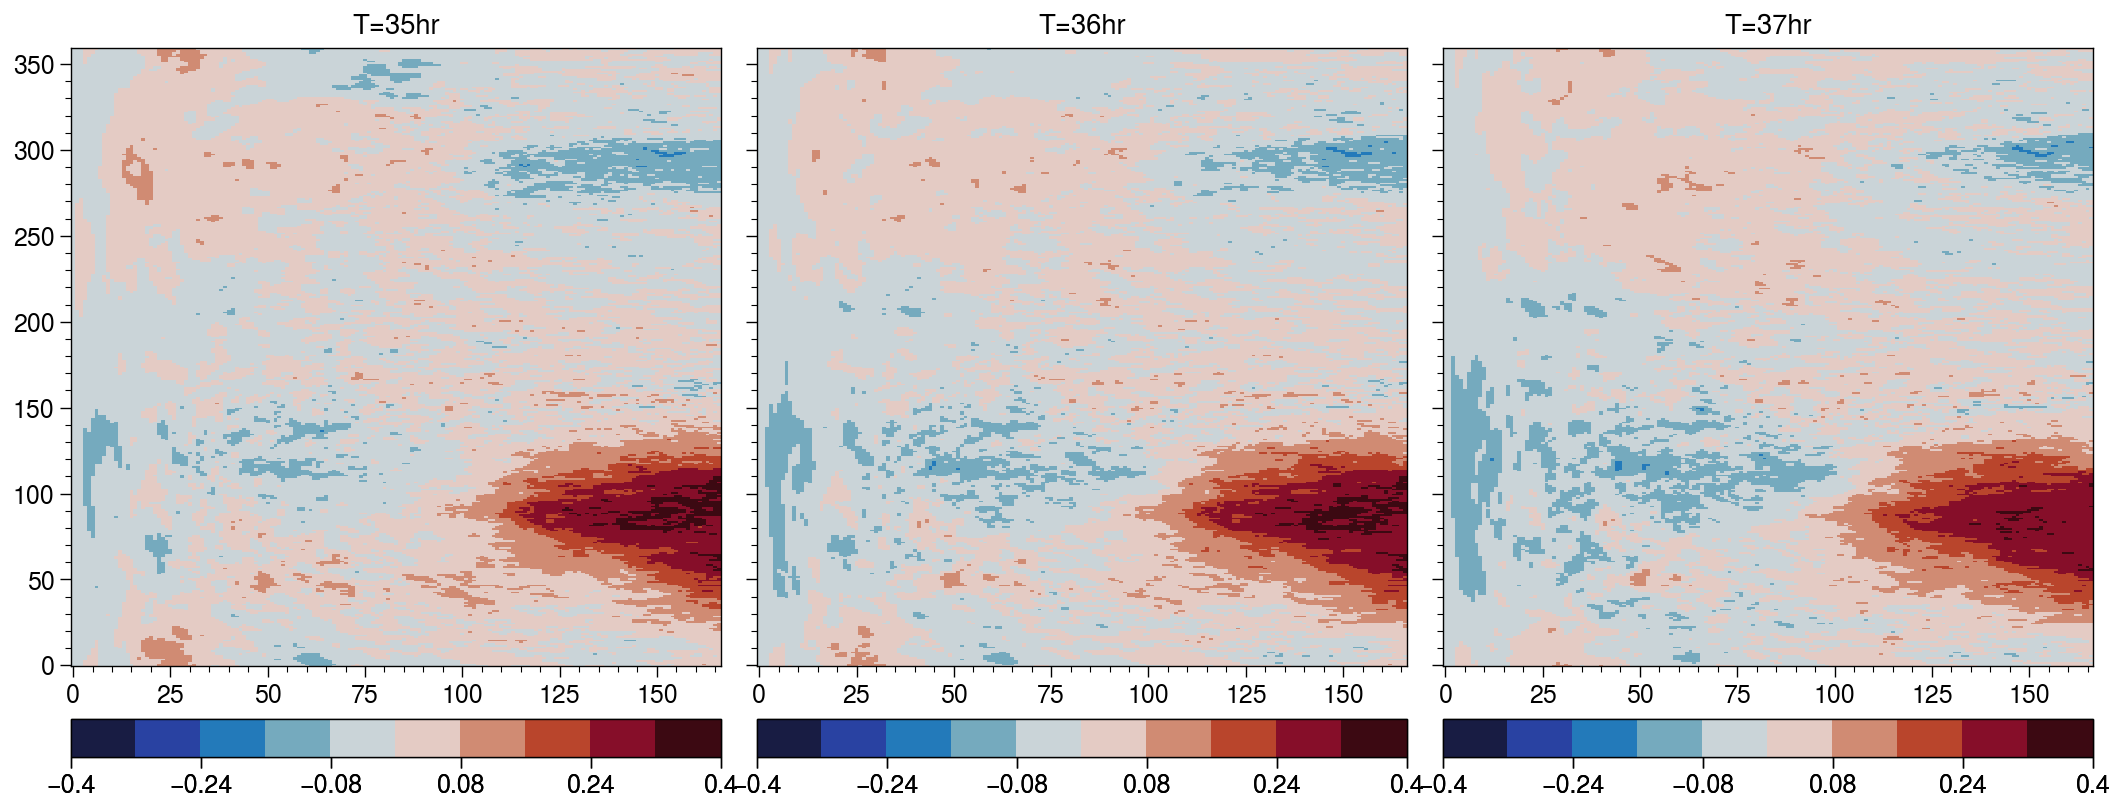

In [35]:
fig,axs = plot.subplots(ncols=3,nrows=1,axwidth=3.25,refaspect=1.051,span=False)
tmp=axs[0].pcolormesh(ncrf36_thetagrad_b[34,6,:,:r500]*3600,cmap='balance',vmin=-0.4,vmax=0.4)
axs[0].colorbar(tmp,loc='b')
axs[0].format(title='T=35hr')
tmp=axs[1].pcolormesh(ncrf36_thetagrad_b[35,6,:,:r500]*3600,cmap='balance',vmin=-0.4,vmax=0.4)
axs[1].colorbar(tmp,loc='b')
axs[1].format(title='T=36hr')
tmp=axs[2].pcolormesh(ncrf36_thetagrad_b[36,6,:,:r500]*3600,cmap='balance',vmin=-0.4,vmax=0.4)
axs[2].colorbar(tmp,loc='b')
axs[2].format(title='T=37hr')
plt.savefig('./proc_fig/patch_thetagrad_ncrf36.png',dpi=200)
plt.show()

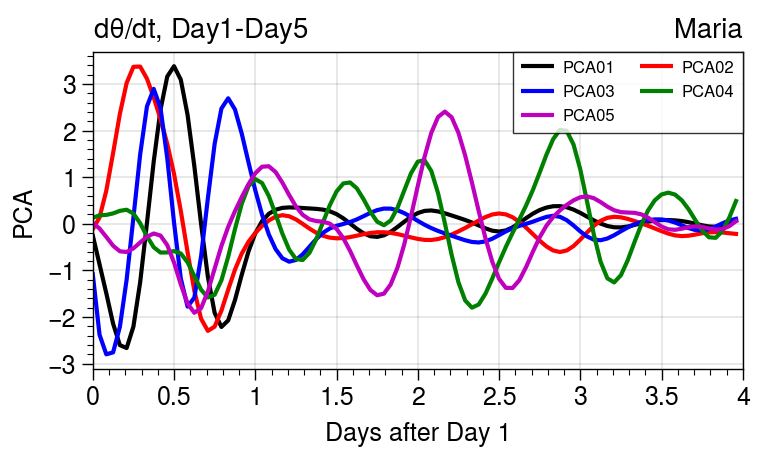

In [17]:
from scipy.ndimage import uniform_filter1d
pca_timeseries = PCA_dict['dtheta'].transform(Af_dict['dtheta'])[:,0:6]/np.sqrt(PCA_dict['dtheta'].explained_variance_[0:6])
NCRF36F_dtheta_firsttest = PCA_dict['dtheta'].transform(normalTncrf36f)[:,0:6]/np.sqrt(PCA_dict['dtheta'].explained_variance_[0:6])
#Plot
#############################################################################################################
fig,axs = plot.subplots(ncols=1,nrows=1,axwidth=3.25,refaspect=2.051,span=False)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(NCRF36F_dtheta_firsttest[:,0],1),c='k',label='PCA01')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(NCRF36F_dtheta_firsttest[:,1],1),c='r',label='PCA02')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(NCRF36F_dtheta_firsttest[:,2],1),c='b',label='PCA03')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(NCRF36F_dtheta_firsttest[:,3],1),c='g',label='PCA04')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(NCRF36F_dtheta_firsttest[:,4],1),c='m',label='PCA05')
axs[0].format(xlim=[0,4],xlabel='Days after Day 1',ylabel='PCA')#ylim=[-10,25],
axs[0].legend(loc='ur',ncols=2,prop={'size':6})
axs[0].format(ltitle=r'd$\theta$/dt, Day1-Day5',rtitle='Maria',yticks=[-3,-2,-1,0,1,2,3])
plt.show()

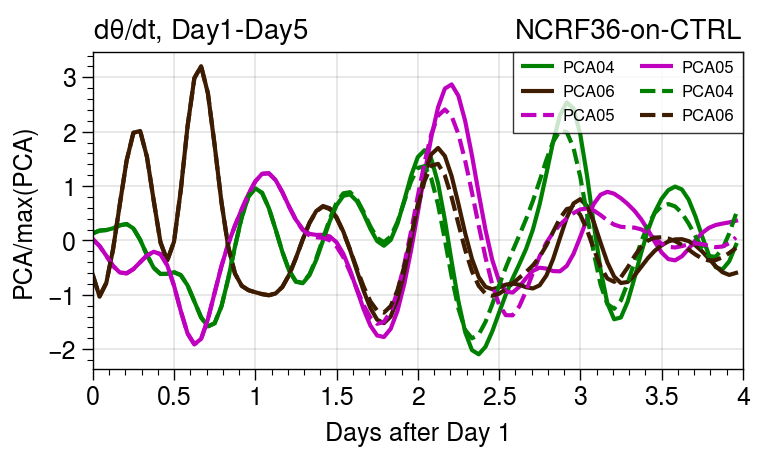

In [18]:
fig,axs = plot.subplots(ncols=1,nrows=1,axwidth=3.25,refaspect=2.051,span=False)
#axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,0],1),c='k',label='PCA01')
#axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,1],1),c='r',label='PCA02')
#axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,2],1),c='b',label='PCA03')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,3],1),c='g',label='PCA04')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,4],1),c='m',label='PCA05')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,5],1),c='chocolate',label='PCA06')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(NCRF36F_dtheta_firsttest[:,3],1),c='g',label='PCA04',ls='--')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(NCRF36F_dtheta_firsttest[:,4],1),c='m',label='PCA05',ls='--')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(NCRF36F_dtheta_firsttest[:,5],1),c='chocolate',label='PCA06',ls='--')

axs[0].format(xlim=[0,4],xlabel='Days after Day 1',ylabel='PCA/max(PCA)')#ylim=[-10,25],
axs[0].legend(loc='ur',ncols=2,prop={'size':6})
axs[0].format(ltitle=r'd$\theta$/dt, Day1-Day5',rtitle='NCRF36-on-CTRL')
plt.savefig('./proc_fig/ctrl_dtPCA_proj_ncrf36.png',dpi=200)
plt.show()

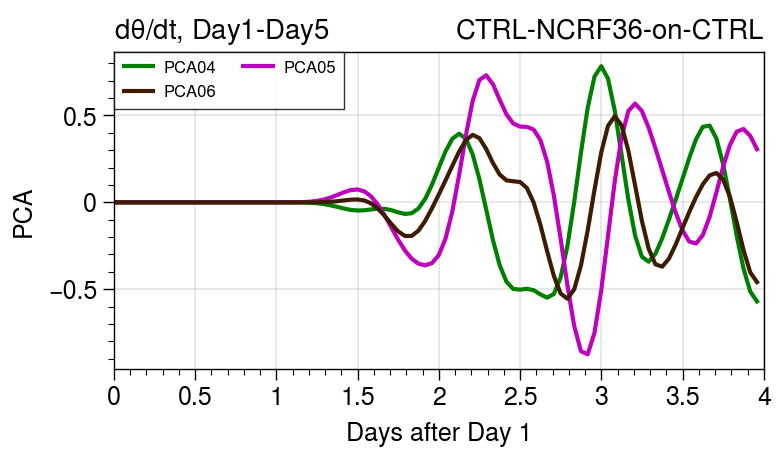

In [25]:
fig,axs = plot.subplots(ncols=1,nrows=1,axwidth=3.25,refaspect=2.051,span=False)
#axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,0],1),c='k',label='PCA01')
#axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,1],1),c='r',label='PCA02')
#axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,2],1),c='b',label='PCA03')
#axs[0].plot(np.linspace(0,95,96)/24,NCRF36F_dtheta_firsttest[:,3]/pca_timeseries[:,3],c='g',label='PCA04')
#axs[0].plot(np.linspace(0,95,96)/24,NCRF36F_dtheta_firsttest[:,4]/pca_timeseries[:,4],c='m',label='PCA05')
#axs[0].plot(np.linspace(0,95,96)/24,NCRF36F_dtheta_firsttest[:,5]/pca_timeseries[:,5],c='chocolate',label='PCA06')
#axs[0].format(xlim=[0,4],xlabel='Days after Day 1',ylabel='PCA')#ylim=[-10,25],
#axs[0].legend(loc='ur',ncols=2,prop={'size':6})
#axs[0].format(ltitle=r'd$\theta$/dt, Day1-Day5',rtitle='NCRF36-on-CTRL/CTRL')

axs[0].plot(np.linspace(0,95,96)/24,-(NCRF36F_dtheta_firsttest[:,3])+(pca_timeseries[:,3]),c='g',label='PCA04')
axs[0].plot(np.linspace(0,95,96)/24,-(NCRF36F_dtheta_firsttest[:,4])+(pca_timeseries[:,4]),c='m',label='PCA05')
axs[0].plot(np.linspace(0,95,96)/24,-(NCRF36F_dtheta_firsttest[:,5])+(pca_timeseries[:,5]),c='chocolate',label='PCA06')
axs[0].format(xlim=[0,4],xlabel='Days after Day 1',ylabel='PCA')#ylim=[-10,25],
axs[0].legend(loc='ul',ncols=2,prop={'size':6})
axs[0].format(ltitle=r'd$\theta$/dt, Day1-Day5',rtitle='CTRL-NCRF36-on-CTRL')
plt.savefig('./proc_fig/ctrl_dtPCA_proj_ncrf36_residual.png',dpi=200)
plt.show()

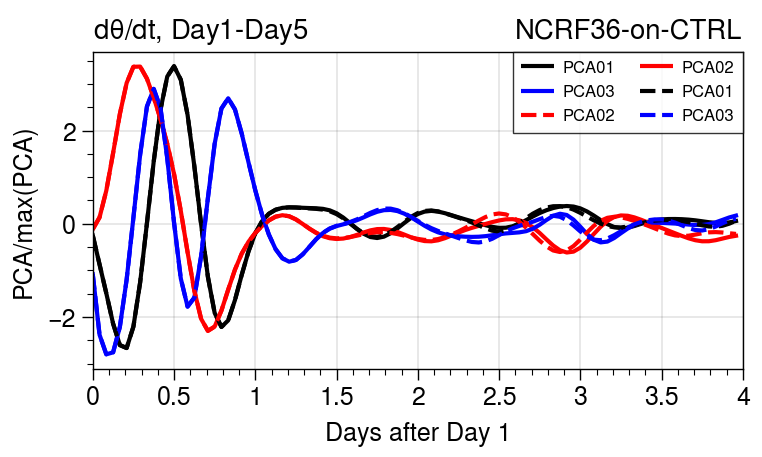

In [49]:
fig,axs = plot.subplots(ncols=1,nrows=1,axwidth=3.25,refaspect=2.051,span=False)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,0],1),c='k',label='PCA01')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,1],1),c='r',label='PCA02')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,2],1),c='b',label='PCA03')
#axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,3],1),c='g',label='PCA04')
#axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,4],1),c='m',label='PCA05')
#axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,5],1),c='chocolate',label='PCA06')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(NCRF36F_dtheta_firsttest[:,0],1),c='k',label='PCA01',ls='--')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(NCRF36F_dtheta_firsttest[:,1],1),c='r',label='PCA02',ls='--')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(NCRF36F_dtheta_firsttest[:,2],1),c='b',label='PCA03',ls='--')

axs[0].format(xlim=[0,4],xlabel='Days after Day 1',ylabel='PCA/max(PCA)')#ylim=[-10,25],
axs[0].legend(loc='ur',ncols=2,prop={'size':6})
axs[0].format(ltitle=r'd$\theta$/dt, Day1-Day5',rtitle='NCRF36-on-CTRL')
plt.savefig('./proc_fig/ctrl_dtPCA_proj_ncrf36_b.png',dpi=200)
plt.show()